In [13]:
# Load the regular expression library
import re
import pandas as pd

In [14]:
main_file = pd.read_csv('content/data_prep_2805_3.csv')
main_file

,Unnamed: 0.1,Unnamed: 0,number,place,country,continent,roughguide link,introduction,description,full_text,...,NE_no_tag,non_NE,non_NE_nouns,freq_nouns,non_NE_tags,freq_NE_int,freq_noun_int,nouns_cleaned,singular_nouns,singular_cleaned_nouns
0,0,0,1,Waikiki,USA,America,https://www.roughguides.com/usa/hawaii/waikiki/,"Built on a reclaimed swamp, two miles east of ...","In places, the parallel Waikiki Beach narrows ...","Built on a reclaimed swamp, two miles east of ...",...,"['Honolulu', 'Waikiki', 'the Ala Wai canal', '...","['Built', 'on', 'a', 'reclaimed', 'swamp', ','...","['swamp', 'miles', 'downtown', 'island', 'city...","[('swamp', 1), ('miles', 1), ('downtown', 1), ...","[('swamp', 'wetland'), ('miles', 'linear_unit'...","[1, 2, 1, 1, 1]","[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 1, 1, 1, ...","['swamp', 'miles', 'downtown', 'island', 'city...","['Swamp', 'Mile', 'Downtown', 'Island', 'City'...","['Swamp', 'Mile', 'Downtown', 'Island', 'City'..."
1,1,1,2,The Florida Keys,USA,America,https://www.roughguides.com/usa/florida/florid...,"Folklore, films and widespread hearsay have gi...","Beach view with a vivid sunset at Key West, Fl...","Folklore, films and widespread hearsay have gi...",...,"['FLORIDA', 'Cuba', 'Key West', 'Florida', 'Ke...","['Folklore', ',', 'films', 'and', 'widespread'...","['Folklore', 'films', 'hearsay', 'KEYS', 'mile...","[('Folklore', 1), ('films', 1), ('hearsay', 1)...","[('Folklore', 'lore'), ('films', 'product'), (...","[1, 4, 3, 3, 2, 1, 3, 1, 2, 6, 4, 3, 3, 3, 1, 1]","[1, 1, 1, 1, 3, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, ...","['folklore', 'films', 'hearsay', 'keys', 'mile...","['Folklore', 'Film', 'Hearsay', 'Key', 'Mile',...","['Folklore', 'Film', 'Hearsay', 'Key', 'Mile',..."
2,2,2,3,Yellowstone National Park,USA,America,https://www.roughguides.com/usa/rockies/yellow...,America’s oldest and easily its most famous na...,Not only does Yellowstone deliver jaw-dropping...,America’s oldest and easily its most famous na...,...,"['America', 'YELLOWSTONE NATIONAL PARK', 'Yell...","['’s', 'oldest', 'and', 'easily', 'its', 'most...","['park', 'YELLOWSTONE', 'NATIONAL', 'PARK', 'v...","[('park', 3), ('YELLOWSTONE', 1), ('NATIONAL',...","[('park', 'tract'), ('YELLOWSTONE', '-'), ('NA...","[1, 1, 4, 1, 4, 1, 4]","[3, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...","['park', 'yellowstone', 'national', 'park', 'v...","['Park', 'Yellowstone', 'National', 'Park', 'V...","['Park', 'Yellowstone', 'National', 'Park', 'V..."
3,3,3,4,The Big Island,USA,America,https://www.roughguides.com/usa/hawaii/big-isl...,Although the Big Island of Hawaii could hold a...,"Thanks to the Kilauea volcano, which has destr...",Although the Big Island of Hawaii could hold a...,...,"['the Big Island of Hawaii', 'Captain Cook’s',...","['Although', 'the', 'Big', 'Island', 'of', 'co...","['Island', 'islands', 'room', 'population', 't...","[('Big', 4), ('Island', 4), ('islands', 1), ('...","[('Big', '-'), ('Island', 'land'), ('islands',...","[1, 1, 1, 1, 1, 7, 1, 2, 7, 1, 1, 3, 3, 1, 1, ...","[4, 1, 1, 1, 4, 1, 1, 1, 1, 1, 1, 1, 2, 1, 3, ...","['island', 'islands', 'room', 'population', 't...","['Island', 'Island', 'Room', 'Population', 'To...","['Island', 'Island', 'Room', 'Population', 'To..."
4,4,4,5,The Great Plains,USA,America,https://www.roughguides.com/usa/great-plains/,The rolling hills and vast grasslands of the G...,"The Plains also share a complex, fascinating h...",The rolling hills and vast grasslands of the G...,...,"['the Great Plains', 'Crazy Horse', 'Sitting B...","['The', 'rolling', 'hills', 'and', 'vast', 'gr...","['hills', 'grasslands', 'Great', 'home', 'adve...","[('hills', 2), ('grasslands', 1), ('Great', 4)...","[('hills', 'natural_elevation'), ('grasslands'...","[4, 1, 1, 1, 2, 2, 3, 4, 1, 1, 4, 2, 4, 1, 1, ...","[2, 1, 4, 2, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, ...","['hills', 'grasslands', 'great', 'home', 'adve...","['Hill', 'Grassland', 'Great', 'Home', 'Advent...","['Hill', 'Grassland', 'Great', 'Home', 'Advent..."
...,...,

In [15]:
df = main_file.drop(main_file.columns[[0, 1, 2, 6, 7, 8, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22]], axis=1)
df

,place,country,continent,full_text
0,Waikiki,USA,America,"Built on a reclaimed swamp, two miles east of ..."
1,The Florida Keys,USA,America,"Folklore, films and widespread hearsay have gi..."
2,Yellowstone National Park,USA,America,America’s oldest and easily its most famous na...
3,The Big Island,USA,America,Although the Big Island of Hawaii could hold a...
4,The Great Plains,USA,America,The rolling hills and vast grasslands of the G...
...,...,...,...,...
95,Picos de Europa,Spanien,Europa,The Picos de Europa may not be the highest mou...
96,Santander,Spanien,Europa,"Easily the largest city in Cantabria, with a p..."
97,Malaga,Spanien,Europa,MÁLAGA seems at first an uninviting place. It’...
98,Ibiza,Spanien,Europa,"IBIZA, or Eivissa in Catalan, is an island of ..."


In [16]:
import string

text = df.at[1,'full_text']
text = text.translate(str.maketrans('', '', string.punctuation))
text = text.lower()
text

'folklore films and widespread hearsay have given the florida keys – a hundredmile chain of islands that runs to within ninety miles of cuba – an image of glamorous intrigue they don’t really deserve at least not now that the gogo days of the cocaine cowboys in the 1980s are long gone beach view with a vivid sunset at key west florida usathe keys can more accurately be described as an outdoorlover’s paradise where fishing snorkelling and diving dominate terrific untainted natural areas include the florida reef a great band of living coral just a few miles off the coast but for many the various keys are only stops on the way to key west this selfproclaimed “conch republic” has vibrant caribbeanstyle streets with plenty of convivial bars in which to while away the hours watching the spectacular sunsetswherever you are on the keys you’ll experience distinctive cuisine served for the most part in hip little shacks where the food is fresh and the atmosphere laidback conch a rich meaty mollu

In [18]:
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
import gensim
from gensim.utils import simple_preprocess
from nltk.corpus import stopwords

[nltk_data] Error loading stopwords: <urlopen error [SSL:
[nltk_data]     CERTIFICATE_VERIFY_FAILED] certificate verify failed:
[nltk_data]     unable to get local issuer certificate (_ssl.c:1122)>


In [21]:
stop_words = stopwords.words('english')
stop_words.extend(['from', 'subject', 're', 'edu', 'use', '–'])

words = re.sub('['+string.punctuation+']', '', text).split()
preprocessed_text = []
for word in words:
    if word not in stop_words:
        preprocessed_text.append(word)
preprocessed_text

['folklore',
 'films',
 'widespread',
 'hearsay',
 'given',
 'florida',
 'keys',
 'hundredmile',
 'chain',
 'islands',
 'runs',
 'within',
 'ninety',
 'miles',
 'cuba',
 'image',
 'glamorous',
 'intrigue',
 'don’t',
 'really',
 'deserve',
 'least',
 'gogo',
 'days',
 'cocaine',
 'cowboys',
 '1980s',
 'long',
 'gone',
 'beach',
 'view',
 'vivid',
 'sunset',
 'key',
 'west',
 'florida',
 'usathe',
 'keys',
 'accurately',
 'described',
 'outdoorlover’s',
 'paradise',
 'fishing',
 'snorkelling',
 'diving',
 'dominate',
 'terrific',
 'untainted',
 'natural',
 'areas',
 'include',
 'florida',
 'reef',
 'great',
 'band',
 'living',
 'coral',
 'miles',
 'coast',
 'many',
 'various',
 'keys',
 'stops',
 'way',
 'key',
 'west',
 'selfproclaimed',
 '“conch',
 'republic”',
 'vibrant',
 'caribbeanstyle',
 'streets',
 'plenty',
 'convivial',
 'bars',
 'away',
 'hours',
 'watching',
 'spectacular',
 'sunsetswherever',
 'keys',
 'you’ll',
 'experience',
 'distinctive',
 'cuisine',
 'served',
 'part',


In [22]:
text = df.at[1,'full_text']
sentences = text.split('.')
sentences_lower = []
for sentence in sentences:
    sentence_list = []
    sentence = sentence.lower()
    words = re.sub('['+string.punctuation+']', '', sentence).split()
    for word in words:
        if word not in stop_words:
            sentence_list.append(word)
    sentences_lower.append(sentence_list)
sentences_lower

[['folklore',
  'films',
  'widespread',
  'hearsay',
  'given',
  'florida',
  'keys',
  'hundredmile',
  'chain',
  'islands',
  'runs',
  'within',
  'ninety',
  'miles',
  'cuba',
  'image',
  'glamorous',
  'intrigue',
  'don’t',
  'really',
  'deserve',
  'least',
  'gogo',
  'days',
  'cocaine',
  'cowboys',
  '1980s',
  'long',
  'gone'],
 ['beach',
  'view',
  'vivid',
  'sunset',
  'key',
  'west',
  'florida',
  'usathe',
  'keys',
  'accurately',
  'described',
  'outdoorlover’s',
  'paradise',
  'fishing',
  'snorkelling',
  'diving',
  'dominate'],
 ['terrific',
  'untainted',
  'natural',
  'areas',
  'include',
  'florida',
  'reef',
  'great',
  'band',
  'living',
  'coral',
  'miles',
  'coast'],
 ['many', 'various', 'keys', 'stops', 'way', 'key', 'west'],
 ['selfproclaimed',
  '“conch',
  'republic”',
  'vibrant',
  'caribbeanstyle',
  'streets',
  'plenty',
  'convivial',
  'bars',
  'away',
  'hours',
  'watching',
  'spectacular',
  'sunsets'],
 ['wherever',
  'k

In [23]:
preprocessed = []
preprocessed.append(preprocessed_text)
preprocessed

[['folklore',
  'films',
  'widespread',
  'hearsay',
  'given',
  'florida',
  'keys',
  'hundredmile',
  'chain',
  'islands',
  'runs',
  'within',
  'ninety',
  'miles',
  'cuba',
  'image',
  'glamorous',
  'intrigue',
  'don’t',
  'really',
  'deserve',
  'least',
  'gogo',
  'days',
  'cocaine',
  'cowboys',
  '1980s',
  'long',
  'gone',
  'beach',
  'view',
  'vivid',
  'sunset',
  'key',
  'west',
  'florida',
  'usathe',
  'keys',
  'accurately',
  'described',
  'outdoorlover’s',
  'paradise',
  'fishing',
  'snorkelling',
  'diving',
  'dominate',
  'terrific',
  'untainted',
  'natural',
  'areas',
  'include',
  'florida',
  'reef',
  'great',
  'band',
  'living',
  'coral',
  'miles',
  'coast',
  'many',
  'various',
  'keys',
  'stops',
  'way',
  'key',
  'west',
  'selfproclaimed',
  '“conch',
  'republic”',
  'vibrant',
  'caribbeanstyle',
  'streets',
  'plenty',
  'convivial',
  'bars',
  'away',
  'hours',
  'watching',
  'spectacular',
  'sunsetswherever',
  '

In [24]:
import gensim.corpora as corpora

# Create Dictionary
id2word = corpora.Dictionary(sentences_lower)
id2word

In [25]:
# Create Corpus
texts = preprocessed_text

# Create Corpus
texts = sentences_lower

# Term Document Frequency
corpus = [id2word.doc2bow(text) for text in texts]

# View
print(id2word)
print(corpus[:1][0][:30])

Dictionary<177 unique tokens: ['1980s', 'chain', 'cocaine', 'cowboys', 'cuba']...>
[(0, 1), (1, 1), (2, 1), (3, 1), (4, 1), (5, 1), (6, 1), (7, 1), (8, 1), (9, 1), (10, 1), (11, 1), (12, 1), (13, 1), (14, 1), (15, 1), (16, 1), (17, 1), (18, 1), (19, 1), (20, 1), (21, 1), (22, 1), (23, 1), (24, 1), (25, 1), (26, 1), (27, 1), (28, 1)]


In [26]:
import gensim
from pprint import pprint

# number of topics
num_topics = 5

# Build LDA model
lda_model = gensim.models.LdaMulticore(corpus=corpus,
                                       id2word=id2word,
                                       num_topics=num_topics)

# Print the Keyword in the 10 topics
pprint(lda_model.print_topics())
doc_lda = lda_model[corpus]
doc_lda

[(0,
  '0.023*"florida" + 0.023*"miles" + 0.015*"great" + 0.015*"terrific" + '
  '0.015*"coast" + 0.015*"band" + 0.015*"areas" + 0.015*"include" + '
  '0.015*"untainted" + 0.015*"reef"'),
 (1,
  '0.022*"little" + 0.022*"served" + 0.020*"key" + 0.018*"keys" + '
  '0.014*"cuisine" + 0.014*"laidback" + 0.014*"experience" + '
  '0.014*"atmosphere" + 0.014*"you’ll" + 0.014*"distinctive"'),
 (2,
  '0.041*"west" + 0.040*"key" + 0.032*"mainland" + 0.031*"florida" + '
  '0.026*"keys" + 0.018*"us" + 0.018*"closer" + 0.018*"bit" + 0.018*"contrary" '
  '+ 0.018*"culture"'),
 (3,
  '0.021*"attitudes" + 0.017*"served" + 0.015*"gay" + 0.015*"stimulated" + '
  '0.015*"particular" + 0.015*"liberal" + 0.015*"two" + 0.015*"estimated" + '
  '0.015*"large" + 0.015*"influx"'),
 (4,
  '0.012*"tourists" + 0.012*"expanse" + 0.012*"year" + 0.012*"adrift" + '
  '0.011*"spirit" + 0.011*"resonates" + 0.011*"million" + 0.011*"individual" + '
  '0.011*"groceries" + 0.011*"islanders"')]


In [31]:
import pyLDAvis.gensim_models
import pickle
import pyLDAvis

# Visualize the topics
pyLDAvis.enable_notebook()

LDAvis_data_filepath = 'lda_vis_10'

# # this is a bit time consuming - make the if statement True
# # if you want to execute visualization prep yourself
if 1 == 1:
    LDAvis_prepared = pyLDAvis.gensim_models.prepare(lda_model, corpus, id2word)
    with open(LDAvis_data_filepath, 'wb') as f:
        pickle.dump(LDAvis_prepared, f)

# load the pre-prepared pyLDAvis data from disk
with open(LDAvis_data_filepath, 'rb') as f:
    LDAvis_prepared = pickle.load(f)

pyLDAvis.save_html(LDAvis_prepared, LDAvis_data_filepath +'.html')
LDAvis_prepared

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/pyLDAvis/_prepare.py:246: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  default_term_info = default_term_info.sort_values(


PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
0      0.073750  0.064882       1        1  31.800013
1      0.064334 -0.071581       2        1  22.967197
2     -0.028845 -0.039925       3        1  17.573273
3     -0.076952 -0.003892       4        1  16.098742
4     -0.032287  0.050516       5        1  11.560774, topic_info=          Term      Freq     Total Category  logprob  loglift
43        west  2.000000  2.000000  Default  30.0000  30.0000
117   mainland  1.000000  1.000000  Default  29.0000  29.0000
35         key  3.000000  3.000000  Default  28.0000  28.0000
9      florida  3.000000  3.000000  Default  27.0000  27.0000
119  attitudes  1.000000  1.000000  Default  26.0000  26.0000
..         ...       ...       ...      ...      ...      ...
167        old  0.239278  1.129387   Topic5  -4.5858   0.6057
48       great  0.256796  1.726309   Topic5  -4.5151   0.2521
158   churches  0.238837  1.130011   Topic5  -4.5876   0.6034
100      green  0.245562  1.616890   Topic5  -4.5599   0.2728
80    laidback  0.238437  1.435641   Topic5  -4.5893   0.3623

[208 rows x 6 columns], token_table=      Topic      Freq              Term
term                                   
0         1  0.809080             1980s
29        3  0.951021        accurately
156       1  0.888085  africanbahamians
44        1  0.740448             areas
73        2  0.945648        atmosphere
...     ...       ...               ...
42        3  0.956204             vivid
43        3  0.479834              west
85        2  0.945619          wherever
28        1  0.807037            within
86        2  0.945618            you’ll

[111 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[1, 2, 3, 4, 5])

In [36]:
from collections import Counter
topics = lda_model.show_topics(formatted=False)
data_flat = [w for w_list in data_ready for w in w_list]
counter = Counter(data_flat)

out = []
for i, topic in topics:
    for word, weight in topic:
        out.append([word, i , weight, counter[word]])

df = pd.DataFrame(out, columns=['word', 'topic_id', 'importance', 'word_count'])

# Plot Word Count and Weights of Topic Keywords
fig, axes = plt.subplots(2, 2, figsize=(16,10), sharey=True, dpi=160)
cols = [color for name, color in mcolors.TABLEAU_COLORS.items()]
for i, ax in enumerate(axes.flatten()):
    ax.bar(x='word', height="word_count", data=df.loc[df.topic_id==i, :], color=cols[i], width=0.5, alpha=0.3, label='Word Count')
    ax_twin = ax.twinx()
    ax_twin.bar(x='word', height="importance", data=df.loc[df.topic_id==i, :], color=cols[i], width=0.2, label='Weights')
    ax.set_ylabel('Word Count', color=cols[i])
    ax_twin.set_ylim(0, 0.030); ax.set_ylim(0, 3500)
    ax.set_title('Topic: ' + str(i), color=cols[i], fontsize=16)
    ax.tick_params(axis='y', left=False)
    ax.set_xticklabels(df.loc[df.topic_id==i, 'word'], rotation=30, horizontalalignment= 'right')
    ax.legend(loc='upper left'); ax_twin.legend(loc='upper right')

fig.tight_layout(w_pad=2)
fig.suptitle('Word Count and Importance of Topic Keywords', fontsize=22, y=1.05)
plt.show()

NameError: name 'data_ready' is not defined

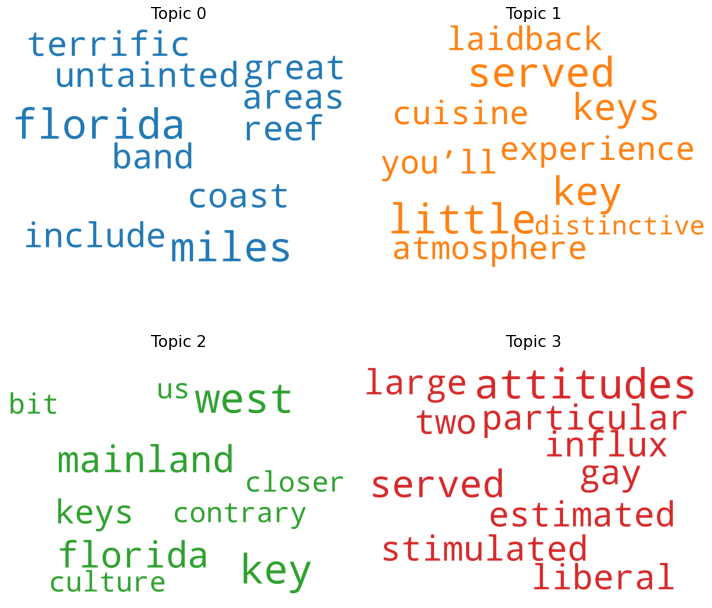

In [37]:
# 1. Wordcloud of Top N words in each topic
from matplotlib import pyplot as plt
from wordcloud import WordCloud, STOPWORDS
import matplotlib.colors as mcolors

cols = [color for name, color in mcolors.TABLEAU_COLORS.items()]  # more colors: 'mcolors.XKCD_COLORS'

cloud = WordCloud(stopwords=stop_words,
                  background_color='white',
                  width=2500,
                  height=1800,
                  max_words=10,
                  colormap='tab10',
                  color_func=lambda *args, **kwargs: cols[i],
                  prefer_horizontal=1.0)

topics = lda_model.show_topics(formatted=False)

fig, axes = plt.subplots(2, 2, figsize=(10,10), sharex=True, sharey=True)

for i, ax in enumerate(axes.flatten()):
    fig.add_subplot(ax)
    topic_words = dict(topics[i][1])
    cloud.generate_from_frequencies(topic_words, max_font_size=300)
    plt.gca().imshow(cloud)
    plt.gca().set_title('Topic ' + str(i), fontdict=dict(size=16))
    plt.gca().axis('off')


plt.subplots_adjust(wspace=0, hspace=0)
plt.axis('off')
plt.margins(x=0, y=0)
plt.tight_layout()
plt.show()

SyntaxError: invalid syntax (4170683303.py, line 9)